<a href="https://colab.research.google.com/github/jasmin-guven/TitanicDataSetVIS/blob/main/titanic_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science with Python notes

In this short lesson, we will use the Titanic dataset, which contains information about the passengers. We will learn the basics of coding in Python, and we will attempt to analyse the data to see if we can find any patterns.

## Aims

In this lession, we will try to answer the following questions:

1. What was the average age of all the passengers on board Titanic?
2. What was the average age of the survivors?
3. How many percent of a) men, b) women and c) children survived?
4. What do our results mean?

## 1. Introduction

Python codes often begin with *comments* and *imports*.

In Python, comments are not 'read' by the code and they are mainly used by coders to make their code more readable by others. Comments can be written anywhere in the code, as long as they start with '#'. They should be used well to describe what we want to do in the lines below the comments.

In [ ]:
# This is a comment. 

If you click 'Run' in the above cell [1], nothing will happen, because the only code in this cell is a comment.

In [2]:
# Imports
import pandas as pd

In the above cell, we have written our first import. Imports, as the name suggests, import libraries, or tools, that Python needs for doing different things. 

As an example, if I asked you to calculate the multiplication 5*6, you would most likely 'import' the times tables of either 5 or 6 in your head and then remember or calculate that the answer to this operation is 30.

In a similar way, computers use imports to *remember* how to do certain operations. In the above case, we import a library called *pandas* which Python uses to create tables for data. We can also import libraries *as* something, so in the above we import the pandas library as 'pd'. This way, we don't need to type out pandas everytime we want to use pandas, and instead we write pd:

In [4]:
# Get data from a url web link
url_to_data = 'https://raw.githubusercontent.com/jasmin-guven/TitanicDataSetVIS/main/titanic.csv'

# Put our data into a table
df = pd.read_csv(url_to_data) # See here we have written pd


There is a lot to unpack in the above cell.

On the first line we have created something called a *variable*. Just like in mathematics, variables can take different values. In this case, our variable is called *url_to_data* and it's value is a link to the dataset we need in this lesson. 

**Note**: It is considered good practice to name variables in a descriptive way, so that it is easier to keep track of them. 

On the second line, we again have a variable, this time called *df*. This is short for *dataframe*. Dataframes are what the Pandas library calls data tables, similar to Excel tables. You can of course name this whatever you like, e.g. table, dataset etc. Just remember to keep it descriptive!

So, so far we have made two variables. You may now think, 'Why do the things after the equals signs for our two variables look so different?'. The first one, which is our link to the data, is inside quotation marks. This is a variable *type* called *string*. Strings are basically normal text, and Python interprets them as such. 

The second one is a bit more confusing. First, we have pd, which we already know stands for Pandas. Next, we have a full stop, followeed by 'read_csv()'. This way of writing (syntax) tells Python to first look at the imported library called Pandas (pd), and then, .read_csv() is a *function* inside that library. We will not go into too much detail about functions here. You just need to know that a function tells Python to do something, in this case '.read_csv()' *reads* a comma-separated variable (csv) file. Then, using the Pandas library, Python puts our data into a dataframe, which we have called df.

Below, we again start with a comment, that explains what we are doing in this cell. Go ahead and click run to see what Python outputs. We can output with a function called print().

In [ ]:
# Check that data was imported correctly
print(df)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


## 2. Data cleaning
Now that we know about variables and can access our dataframe, we can start analysing the data and answer our questions:

1. What was the average age of all the passengers on board Titanic?
2. What was the average age of the survivors?
3. How many percent of a) men, b) women and c) children survived?

First, we need to clean the data, because we do not need all the information given. With dataframes, we can select the columns we want by writing the name of our dataframe and writing the name of the column(s) we want to select in square brackets: 

In [ ]:
# Select the 'Survived' column
# Note here the column name is a string, i.e. normal text, so it
# is written inside quotation marks
print(df['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


When you click run, you can see that Python prints out two columns instead of one. The first one is called the *Index* and it numbers the rows. 

**Note:** In Python, we start counting from 0, not 1!

The second printed column is the one we have selected, in this case the 'Survived' column. At the bottom, Python will also print the name of the column, the 'length' of the column, i.e. the number of rows it contains, as well as *dtype*, which is short for datatype. In this case dtype is int64, this just means that the column contains integers. Don't worry about the number right now.

As an example, let's see what data type the variable url_to_data is. We do this by, again, using a function. This time the function is called type(). Note that we do not need to write the name of any library in front of type(), in contrast to the pd.read_csv() function. This is because type() is already included in the basic Python language. Go ahead and run the cell below.

In [ ]:
# Example: Print the data type of the variable url_to_data:
print(type(url_to_data))

<class 'str'>


We see that Python prints out 'str' which is the abbreviation of the word 'string', which we have already covered. 

Let's move on to data cleaning. Let's select all the columns we need to answer our questions. We can do this in a similar way to the above, but this time we will list all the columns we want. Because we are selecting multiple columns, we need to add a second pair of square-parantheses:

In [ ]:
# Select the required columns needed to answer our questions
print(df[['Survived','Name','Sex','Age']])

     Survived                                               Name     Sex   Age
0           0                            Braund, Mr. Owen Harris    male  22.0
1           1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0
2           1                             Heikkinen, Miss. Laina  female  26.0
3           1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0
4           0                           Allen, Mr. William Henry    male  35.0
..        ...                                                ...     ...   ...
886         0                              Montvila, Rev. Juozas    male  27.0
887         1                       Graham, Miss. Margaret Edith  female  19.0
888         0           Johnston, Miss. Catherine Helen "Carrie"  female   NaN
889         1                              Behr, Mr. Karl Howell    male  26.0
890         0                                Dooley, Mr. Patrick    male  32.0

[891 rows x 4 columns]


Let's create a new dataframe with our selected columns. We can call this second dataframe 'clean_df', as it is 'cleaned':

In [ ]:
# Create a new variable called clean_df
clean_df = df[['Survived','Name','Sex','Age']]

From now on we will use the clean_df dataframe, as it is smaller and will be easier to handle. 

##3. Results

Now that we have cleaned the data, we can start answering our questions. 

1. What was the average age of all the passengers on board Titanic?
2. What was the average age of the survivors?
3. How many percent of a) men, b) women and c) children survived?


###3.1. What was the average age of all the passengers on board Titanic?

To answer our first question, we need a way of getting the average of the 'Age' column. With the Pandas library, this is easy because it includes a function specifically designed for this task. 

You may already know from your mathematics lessons that the average is also called a mean. In Pandas, the function to calculate the average is .mean(). So, to calculate the mean (average) of the 'Age' column, we need to select that column and then call the .mean() function:

In [ ]:
# Get the mean age of all passengers
print(clean_df['Age'].mean())

29.69911764705882


By running the above cell, we get the average age of all the passengers to be 29.69911764705882. This looks like a very long number and it has too many decimal places. Often in data science we only want to include 1 or 2 decimal places and we may even round up our answer. In this case, we can give our answer to the first question as 29.7 years. 

**1. What was the average age of all the passengers on board Titanic?**

**Answer:** 29.7 years

###3.2. What was the average age of the survivors?

Now that we know the average age of all the passengers, we also want to find out the average age of the *survived* passengers. 

To do this, we need to consider something called a *condition*. This is not very different from the every-day meaning of the word. 

For example, let's say you have a bar of chocolate and your friend has a bag of sweets. You then ask your friend for a sweet, and they agree **only if** they can have a piece of your chocolate. That is, you will get a sweet on the **condition** that you give away one of your sweets. 

In Python, there are similar conditions, and one of them is actually called 'if'. We can then tell Python to do something **if** a certain condition is met. In our case, we want to get the average age of only those passengers who survived. To do this, we need to write a condition that states:

**If the passenger is alive, then get their age and calculate the average.**

With this method, we can get the ages of all the passengers who survived. Let's make a new dataframe that contains the information of survived passengers. 

Before we do this, we need to take a look at our 'Survived' column. 

In [ ]:
# Output the 'Survived' column
print(clean_df['Survived'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Interestingly, the column only contains the numbers 0 and 1. This is because computers often deal in the **binary** system where all the infromation is stored in the form of sequences of 0 and 1. In other words, binary means that there are two options, 0 or 1. In our case of the 'Survived' column we also have two options: 


Did the passenger survive?
*   Yes
*   No

In our dataframe, this is written in terms of a True or False statement. In Python, 0 means False and 1 means True. So, if the value in the 'Survived' column is 0, it means that it is False that the passenger survived, and if it is 1, it is True that the passenger survived. 

Combining this with our knowledge of conditions, we can now write a Python condition to create a dataframe of only survived passengers. For this, we need to use anothe function called .loc[], as the name suggests, it *locates* values in our dataframe. We can then write our condition inside the .loc[] function.

In [ ]:
# Create a new dataframe called survived_df of only the 
# passengers who survived
survived_df = clean_df.loc[clean_df['Survived']== 1]

# Print the new dataframe
print(survived_df)

     Survived  Pclass  ...     Sex   Age
1           1       1  ...  female  38.0
2           1       3  ...  female  26.0
3           1       1  ...  female  35.0
8           1       3  ...  female  27.0
9           1       2  ...  female  14.0
..        ...     ...  ...     ...   ...
875         1       3  ...  female  15.0
879         1       1  ...  female  56.0
880         1       2  ...  female  25.0
887         1       1  ...  female  19.0
889         1       1  ...    male  26.0

[342 rows x 5 columns]


Then, to answer the second question, we can again call the .mean() function on the 'Age' column of the survived_df dataframe:

In [ ]:
# From the survived_df calculate the average age
print(survived_df['Age'].mean())

28.343689655172415


**Note:** Don't forget to round up the answer and only give 1 decimal place! And remember to give the answer with its units.

**2. What was the average age of the survivors?**

**Answer:** 28.3 years

###3.3. How many percent of a) men, b) women and c) children survived?

Let's start with a) how many men survived? 

For this, we need the total number of men on board the Titanic as well as the number of men that survived. Let's use our clean_df to get the total number of men on board. We can do this with another condition, this time using the 'Sex' column and either 'male' or 'female'. Let's call this new dataframe men_df. 

**Note:** We should exclude children whose age is less than 18 years, otherwise we would be counting children in all parts a), b) and c)!

Let's first create a dataframe of adults over the age of 18 years.


In [ ]:
# Create a dataframe of only adults
adults_df = clean_df.loc[clean_df['Age'] >= 18.0]

# Print the new dataframe
print(adults_df)

     Survived  Pclass  ...     Sex   Age
0           0       3  ...    male  22.0
1           1       1  ...  female  38.0
2           1       3  ...  female  26.0
3           1       1  ...  female  35.0
4           0       3  ...    male  35.0
..        ...     ...  ...     ...   ...
885         0       3  ...  female  39.0
886         0       2  ...    male  27.0
887         1       1  ...  female  19.0
889         1       1  ...    male  26.0
890         0       3  ...    male  32.0

[601 rows x 5 columns]


The '>=' sign means 'greater than or equal to' which will be familiar to you from your mathematics lessons. The 'and' statement is included in Python, similar to the 'if' statement.

We can then select only the male adults:

In [ ]:
# Create a dataframe of only men
men_df = adults_df.loc[adults_df['Sex']=='male']

# Print the new dataframe
print(men_df)

     Survived  Pclass                            Name   Sex   Age
0           0       3         Braund, Mr. Owen Harris  male  22.0
4           0       3        Allen, Mr. William Henry  male  35.0
6           0       1         McCarthy, Mr. Timothy J  male  54.0
12          0       3  Saundercock, Mr. William Henry  male  20.0
13          0       3     Andersson, Mr. Anders Johan  male  39.0
..        ...     ...                             ...   ...   ...
883         0       2   Banfield, Mr. Frederick James  male  28.0
884         0       3          Sutehall, Mr. Henry Jr  male  25.0
886         0       2           Montvila, Rev. Juozas  male  27.0
889         1       1           Behr, Mr. Karl Howell  male  26.0
890         0       3             Dooley, Mr. Patrick  male  32.0

[395 rows x 5 columns]


Let's select only the 'Survived' and the 'Sex' columns.

In [ ]:
# Select only the needed columns
men_df = men_df[['Sex','Survived']]

# Print new dataframe
print(men_df)

      Sex  Survived
0    male         0
4    male         0
6    male         0
12   male         0
13   male         0
..    ...       ...
883  male         0
884  male         0
886  male         0
889  male         1
890  male         0

[395 rows x 2 columns]


Now we can get the total number of men on board by getting the number of rows in the above dataframe. We can do this with a Python function called len(), which is short for 'length'. Let's create a variable called 'total_men' that will correspond to the number of total men on board:

In [ ]:
# Show the number of rows in men_df, i.e. total number of men
total_men = len(men_df)

# Print number of total men on board
print(total_men)

395


So, there were 395 men in total. Next, we need to select only the survived men from men_df and see how many men survived. Let's create a new dataframe called survived_men_df:

In [ ]:
# Select only survived men 
survived_men_df = men_df.loc[men_df['Survived']==1]

# Print the new dataframe
print(survived_men_df)

      Sex  Survived
21   male         1
23   male         1
74   male         1
81   male         1
97   male         1
..    ...       ...
804  male         1
821  male         1
838  male         1
857  male         1
889  male         1

[70 rows x 2 columns]


We can then use the len() function on this dataframe to get the number of survived men:

In [ ]:
# Get the number of survived men
survived_men = len(survived_men_df)

# Print the number of survived men 
print(survived_men)

70


So 70 men survived. How do we calculate the percentage of men who survived? 

This will probably be familiar to you from mathematics:

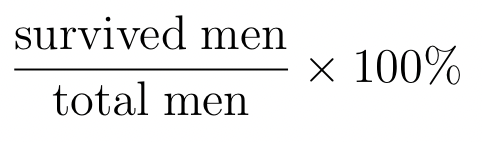



This type of calculation is easy in Python, as we can use the operators +, -, * and / in the normal way! Even though Python can do the order of operations correctly, let's use parantheses for the division, to make it more clear:

In [ ]:
# Calculate the percentage of men who survived
percentage_men = (survived_men / total_men) * 100

# Print the percentage
print(percentage_men)

17.72151898734177


And again, let's round our number, give 1 decimal place and use the correct units! 

**3.3. a) How many percent of men survived?**

**Answer:** 17.7%

To answer part b), we can do the exact same but this time using 'female' instead of 'male'. 

**Can you write this bit of code yourself?**

In [ ]:
# Create a dataframe of only women from the adults_df
women_df = adults_df.loc[adults_df['Sex']=='female']

# Print the new dataframe
print(women_df)

     Survived  Pclass  ...     Sex   Age
1           1       1  ...  female  38.0
2           1       3  ...  female  26.0
3           1       1  ...  female  35.0
8           1       3  ...  female  27.0
11          1       1  ...  female  58.0
..        ...     ...  ...     ...   ...
879         1       1  ...  female  56.0
880         1       2  ...  female  25.0
882         0       3  ...  female  22.0
885         0       3  ...  female  39.0
887         1       1  ...  female  19.0

[206 rows x 5 columns]


In [ ]:
# Select only the needed columns ('Sex' and 'Survived')
women_df = women_df[['Sex', 'Survived']]

# Print the new dataframe 
print(women_df)

        Sex  Survived
1    female         1
2    female         1
3    female         1
8    female         1
11   female         1
..      ...       ...
879  female         1
880  female         1
882  female         0
885  female         0
887  female         1

[206 rows x 2 columns]


In [ ]:
# Create a variable for the number of rows in women_df, 
# i.e. total number of women
total_women = len(women_df)

# Print number of total women on board
print(total_women)

206


In [ ]:
# Select only survived women
survived_women_df = women_df.loc[women_df['Survived']==1]

# Print the new dataframe
print(survived_women_df)

        Sex  Survived
1    female         1
2    female         1
3    female         1
8    female         1
11   female         1
..      ...       ...
871  female         1
874  female         1
879  female         1
880  female         1
887  female         1

[159 rows x 2 columns]


In [ ]:
# Get the number of survived women
survived_women = len(survived_women_df)

# Print the number of survived women
print(survived_women)

159


In [ ]:
# Calculate the percentage of women who survived
percentage_women = (survived_women / total_women) * 100

# Print the percentage
print(percentage_women)

77.18446601941747


**3.3. b) How many percent of women survived?**

**Answer**: 

Next let's try to answer part c).

This is again very similar to the above, except that we need to select children whose age is less than 18.0 years from our clean_df. 

**How do you select this from the clean_df?**

In [ ]:
# Create a dataframe of only children
children_df = clean_df.loc[clean_df['Age'] < 18.0]

# Print the new dataframe
print(children_df)

     Survived  Pclass                                     Name     Sex   Age
7           0       3           Palsson, Master. Gosta Leonard    male   2.0
9           1       2      Nasser, Mrs. Nicholas (Adele Achem)  female  14.0
10          1       3          Sandstrom, Miss. Marguerite Rut  female   4.0
14          0       3     Vestrom, Miss. Hulda Amanda Adolfina  female  14.0
16          0       3                     Rice, Master. Eugene    male   2.0
..        ...     ...                                      ...     ...   ...
850         0       3  Andersson, Master. Sigvard Harald Elias    male   4.0
852         0       3                  Boulos, Miss. Nourelain  female   9.0
853         1       1                Lines, Miss. Mary Conover  female  16.0
869         1       3          Johnson, Master. Harold Theodor    male   4.0
875         1       3         Najib, Miss. Adele Kiamie "Jane"  female  15.0

[113 rows x 5 columns]


**How do we select only the required columns 'Survived' and 'Age'?**

In [ ]:
# Select only the required columns
children_df = children_df[['Survived','Age']]

# Print the new dataframe
print(children_df)

     Survived   Age
7           0   2.0
9           1  14.0
10          1   4.0
14          0  14.0
16          0   2.0
..        ...   ...
850         0   4.0
852         0   9.0
853         1  16.0
869         1   4.0
875         1  15.0

[113 rows x 2 columns]


**Can you get the total number of children?**

In [ ]:
# Create a variable for the number of rows in children_df
# i.e. the total number of children
total_children = len(children_df)

# Print number of total children on board
print(total_children)

113


**How many children survived?**

In [ ]:
# Create a new dataframe from children_df of only survived children
survived_children_df = children_df.loc[children_df['Survived']== 1]

# Print the new dataframe
print(survived_children_df)

     Survived    Age
9           1  14.00
10          1   4.00
22          1  15.00
39          1  14.00
43          1   3.00
..        ...    ...
830         1  15.00
831         1   0.83
853         1  16.00
869         1   4.00
875         1  15.00

[61 rows x 2 columns]


**Can you get the number of survived children?**

In [ ]:
# Get the number of survived children
survived_children = len(survived_children_df)

# Print the number of survived children
print(survived_children)

61


**How many percent of children survived?**

In [ ]:
# Calculate the percentage of children who survived
percentage_children = (survived_children / total_children) * 100

# Print the percentage
print(percentage_children)

53.98230088495575


**3.3. c) How many percent of children survived?**

**Answer:** 

##4. Data analysis

Now that we have answered all of our questions, we need to analyse the results. 

This is a very important part of data science, as we need to understand what our results mean as well as why we have obtained these results. 

Let's summarise our results here:


**Average age of passengers:** 29.7 years

**Average age of survivors:** 28.3 years

**Percentage of men who survived:** 17.7%

**Percentage of women who survived:** 77.2%

**Percentage of children who survived:** 54.0%

To analyse our results, we can ask ourselves the following questions:

1. Why is the average age of survivors lower than the average age of all the passengers?

2. Why did only 17.7% of men survive?

3. Why did 77.2% of women survive?

4. Why did 54.0% of children survive?
